In [1]:
# This is an example of running the model through a twitch

In [2]:
import json as json
import matplotlib.pyplot as plt
import os

import multifil

imported myosin multifil


In [3]:
hs = multifil.hs.hs()  # Run the model with a_p = 1.0, allowing xb cycling
forces = hs.run(10)


MainProcess finished timestep 1 of 10, 0h0m4s left
MainProcess finished timestep 2 of 10, 0h0m3s left
MainProcess finished timestep 3 of 10, 0h0m3s left
MainProcess finished timestep 4 of 10, 0h0m3s left
MainProcess finished timestep 5 of 10, 0h0m2s left
MainProcess finished timestep 6 of 10, 0h0m2s left
MainProcess finished timestep 7 of 10, 0h0m1s left
MainProcess finished timestep 8 of 10, 0h0m1s left
MainProcess finished timestep 9 of 10, 0h0m0s left
MainProcess finished timestep 10 of 10, 0h0m0s left

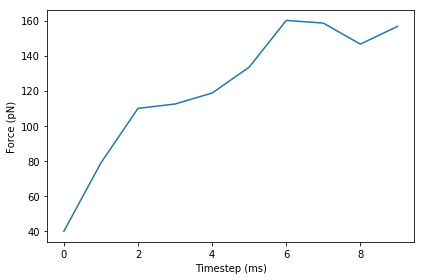

In [4]:
fig, ax = plt.subplots(1,1)
ax.plot(forces)
ax.set(xlabel="Timestep (ms)", ylabel="Force (pN)")
plt.tight_layout()

In [5]:
time_trace = multifil.aws.metas.time(
    .5, # ms per timestep
    50, # ms to run for
                                    )
length_trace = multifil.aws.metas.zline_workloop(
    1200, # resting hs length 
    10, # peak to peak amp 
    25, # cycle freq in Hz 
    time_trace
                                                )

'''init params freq=25, phase=0.1, stim_duration=20, influx_time=2, half_life=10, time=time'''
'''first twitch: 5, 10, 50, 2, 10'''
'''positive workloop params: 25, # freq in Hz, 0.1, # phase offset, 10, # stimulus duration in ms
    2, # time it takes for ca to go from 10 to 90% of influx level, 10, # half life of Ca decay, time_trace'''
actin_permissiveness_trace = multifil.aws.metas.actin_permissiveness_workloop(
    25, # freq in Hz 
    0.1, # phase offset 
    20, # stimulus duration in ms
    2, # time it takes for ca to go from 10 to 90% of influx level
    10, # half life of Ca decay 
    time_trace
                                                                             )

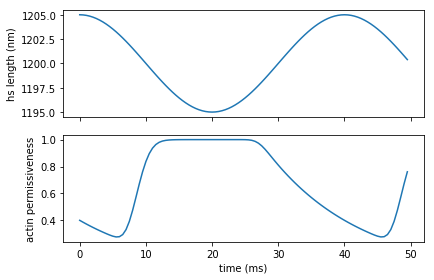

In [6]:
fig, axes = plt.subplots(2,1,sharex=True)
axes[0].plot(time_trace, length_trace)
axes[0].set(ylabel='hs length (nm)')
axes[1].plot(time_trace, actin_permissiveness_trace)
axes[1].set(ylabel='actin permissiveness',
           xlabel='time (ms)')
plt.tight_layout()

In [7]:
output_dir = "../_multifilOutput/"

wl_meta = multifil.aws.metas.emit(output_dir, # local dir to save run output to
                                  None, #s3 bucket to upload results to
                                  time_trace, 
                                  0.5, # poisson ratio, set to const vol here
                                 None, # intial ls, using default by passing none
                                 length_trace, 
                                 actin_permissiveness_trace, 
                                 "an example run", # comment describing run
                                 True, # whether to write out resulting file 
                                  #or just pass back to variable
                                 )
run_name = wl_meta['name']
print(run_name)
run_file = output_dir + run_name + ".meta.json"

935f07a2-5e4f-11ea-9227-185680feb82e


In [8]:
run_manager = multifil.aws.run.manage(run_file, False) # have run.py create the sarc from meta
# Begin running
run_manager.run_and_save()   # with our new sarc, run it

run.py MainProcess # ## finished 1/100 steps, 0h0m42s left


C:\Users\Anthony\Documents\github\fd_multifil\multifil\multifil\ti.py:153: UserWarning: Check radial force direction in titin
  warnings.warn("Check radial force direction in titin")


run.py MainProcess # ## model finished, uploading
run.py MainProcess # ## uploading finished, done with this run


In [15]:
print(run_name)
data_name = run_file.split('.meta')[0] + '.data.json'

with open(data_name, 'r') as file:
    data = json.load(file)
    
for key in data.keys():
    print(key, end=", ")

935f07a2-5e4f-11ea-9227-185680feb82e
actin_permissiveness, axial_force, lattice_spacing, name, radial_force_y, radial_force_z, radial_tension, thick_displace_max, thick_displace_mean, thick_displace_min, thick_displace_std, thin_displace_max, thin_displace_mean, thin_displace_min, thin_displace_std, timestep, timestep_length, xb_fraction_free, xb_fraction_loose, xb_fraction_tight, xb_trans_12, xb_trans_13, xb_trans_21, xb_trans_23, xb_trans_31, xb_trans_32, xb_trans_static, z_line, 

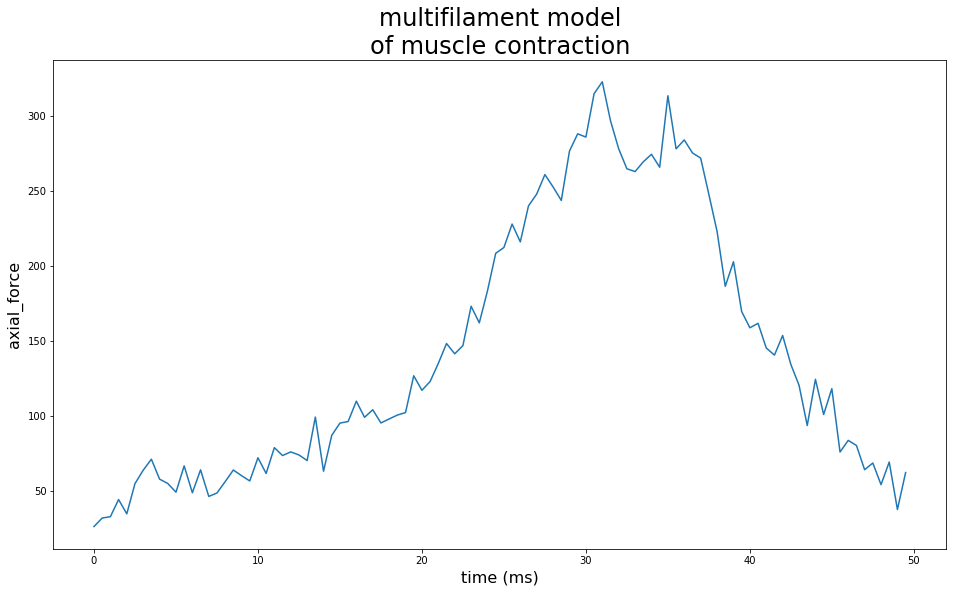

In [25]:
key = "axial_force"
fs = 16

# recreate time trace in milliseconds
time_trace = data['timestep'].copy()
for i in range(len(time_trace)):
    time_trace[i] *= data['timestep_length']

fig, axes = plt.subplots(figsize=(16, 9))
axes.plot(time_trace, data[key])
plt.title("multifilament model\nof muscle contraction", fontsize=fs*1.5)
plt.xlabel("time (ms)", fontsize=fs)
plt.ylabel(key, fontsize=fs)

save = True # OI! make sure you know whats going on here in this statement
if save:
    plt.savefig(output_dir + str(run_name) + "png")